Problem Statement
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.
i have been hired as Data Scientist to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

In [1]:
import pandas as pd
import numpy as np
from time import time
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import requests
#from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split,cross_val_predict, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve, f1_score, roc_auc_score, balanced_accuracy_score,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from scikitplot.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
import shap
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
dictionary = pd.read_csv('train_data_dictionary.csv')
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [3]:
data=pd.read_csv('train_data.csv')
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [6]:
data.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

**WE REPLACE  ΝΑΝ VALUES  MODE   'BED GRADE' & 'CITY CODE PATIENT'**

In [7]:
data['Bed Grade'].fillna(statistics.mode(data['Bed Grade']),inplace=True)
data['City_Code_Patient'].fillna(statistics.mode(data['City_Code_Patient']),inplace=True)

In [8]:
data.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

**WE OBSERVE THE MOST PATIENTS ENTRIES ARE ON  21-30 AND 11-20**

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64


<AxesSubplot:>

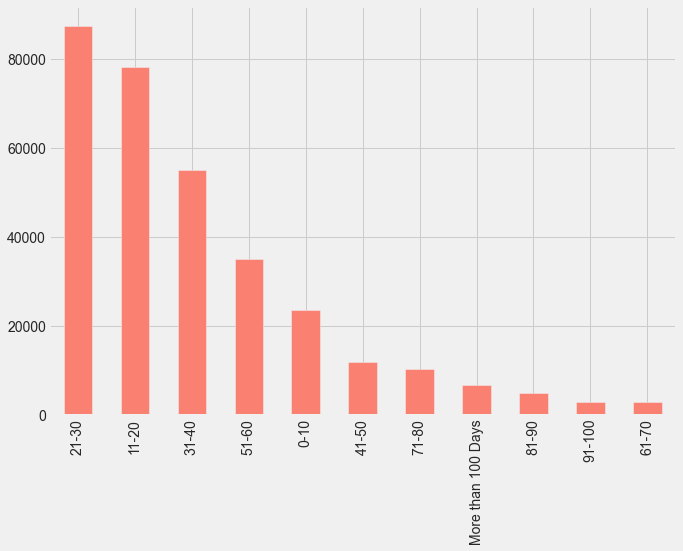

In [9]:
# Distribution of target feature
print(data.Stay.value_counts())
plt.figure(figsize=(10,7))
data.Stay.value_counts().plot(kind="bar", color = ['Salmon'])

In [10]:
# Check for unique values in every column
for features in data.columns:
    print('Unique Values for {}'.format(features))
    print(data[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed Grade
[2. 3. 4. 1.]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 

## **Data Processing & Feature engineering**


#### WE DROP THESE COLUMNS FROM THE DATA

In [11]:
data = data.drop(['Hospital_region_code', 'Bed Grade', 'patientid','case_id', 'City_Code_Patient'], axis = 1)

#### WE APPLY LABEL ENCODER  

In [12]:
label = LabelEncoder()
data['Department'] = label.fit_transform(data['Department'])
data['Hospital_type_code'] = label.fit_transform(data['Hospital_type_code'])
data['Ward_Facility_Code'] = label.fit_transform(data['Ward_Facility_Code'])
data['Ward_Type'] = label.fit_transform(data['Ward_Type'])
data['Type of Admission'] = label.fit_transform(data['Type of Admission'])
data['Severity of Illness'] = label.fit_transform(data['Severity of Illness'])

<AxesSubplot:>

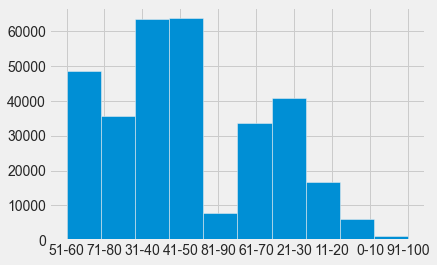

In [13]:
# Check age distribution
data.Age.hist()

In [14]:
data.Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [15]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [16]:
data['Age'] = data['Age'].replace(age_dict.keys(), age_dict.values())

In [17]:
data.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

#### WE SEPERATE THE TARGET INTO '0-20' - '21-ABOVE' CLASSES .



In [18]:
#stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 2, '41-50': 2, '51-60': 2, '61-70': 2, '71-80': 2, '81-90': 2, '91-100': 2, 'More than 100 Days': 2}

In [19]:
stay_dict = {'0-10': 0, '11-20': 0, '21-30': 1, '31-40': 1, '41-50': 1, '51-60': 1, '61-70': 1, '71-80': 1, '81-90': 1, '91-100': 1, 'More than 100 Days': 1}

In [20]:
data['Stay'] = data['Stay'].replace(stay_dict.keys(), stay_dict.values())

<AxesSubplot:xlabel='Stay', ylabel='count'>

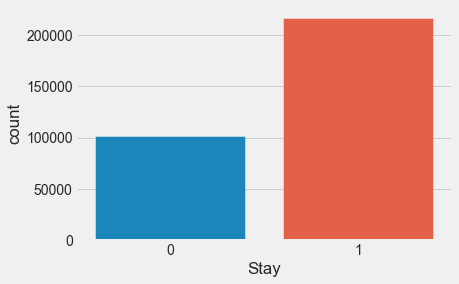

In [21]:
sns.countplot(x=data['Stay'], data=data)

<AxesSubplot:>

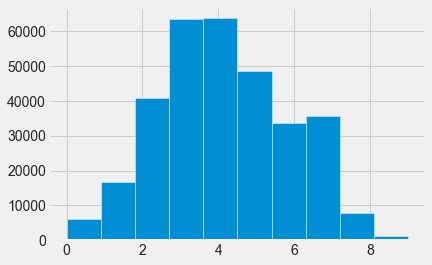

In [22]:
data.Age.hist()

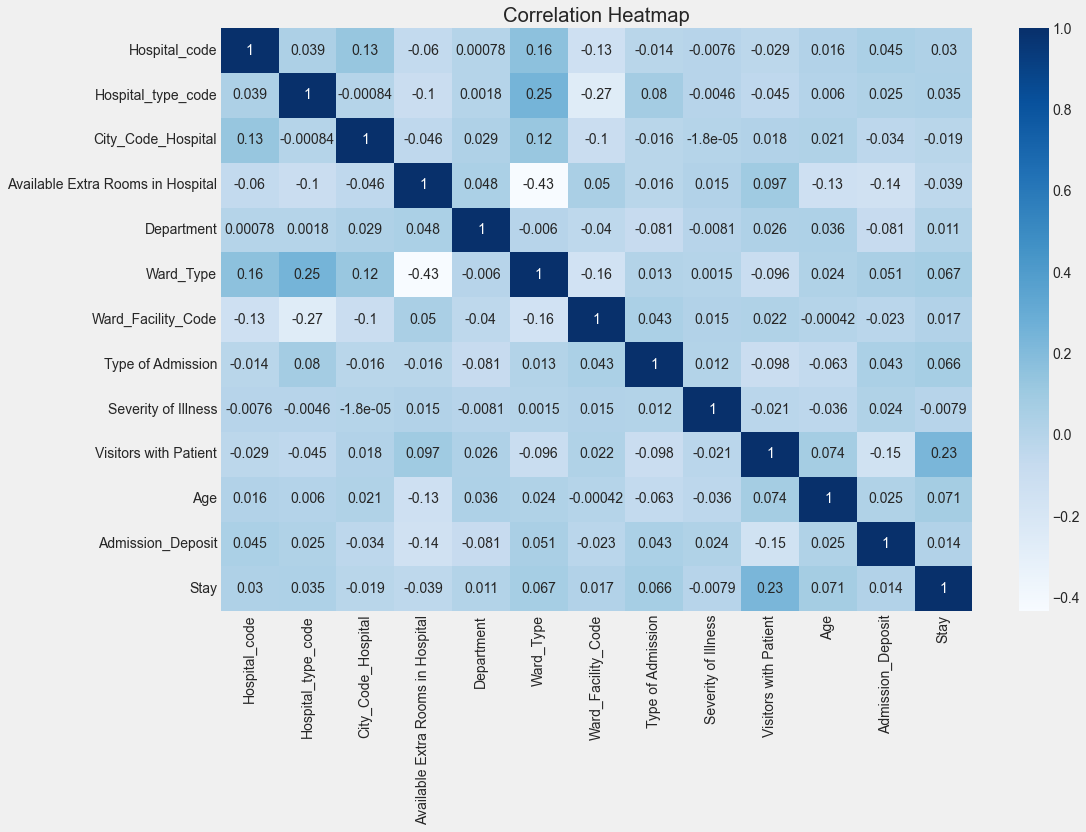

In [23]:
f, ax = plt.subplots(figsize=(15, 10))
plt.title("Correlation Heatmap")
ax=sns.heatmap(data.corr(), annot=True, fmt='.2g',cmap="Blues")

In [24]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int32  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  int32  
 5   Ward_Type                          318438 non-null  int32  
 6   Ward_Facility_Code                 318438 non-null  int32  
 7   Type of Admission                  318438 non-null  int32  
 8   Severity of Illness                318438 non-null  int32  
 9   Visitors with Patient              318438 non-null  int64  
 10  Age                                318438 non-null  int64  
 11  Admission_Deposit                  3184

Scaling Numerical Columns

In [25]:
data['Stay'] # y train

0         0
1         1
2         1
3         1
4         1
         ..
318433    0
318434    1
318435    0
318436    0
318437    0
Name: Stay, Length: 318438, dtype: int64

In [26]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,3,3,2,5,0,0,2,5,4911.0,0
1,2,2,5,2,3,3,5,1,0,2,5,5954.0,1
2,10,4,1,2,1,3,4,1,0,2,5,4745.0,1
3,26,1,2,2,3,2,3,1,0,2,5,7272.0,1
4,26,1,2,2,3,3,3,1,0,2,5,5558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,3,3,1,5,0,2,3,4,4144.0,0
318434,24,0,1,2,1,1,4,2,2,4,8,6699.0,1
318435,7,0,4,3,2,2,5,0,1,3,7,4235.0,0
318436,11,1,2,3,1,1,3,1,1,5,1,3761.0,0


### SPLIT THE DATA

In [27]:
X= data.drop('Stay', axis=1)
y= data['Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True,stratify=y)

### **CLASSIFIERS**

In [28]:
lr = LogisticRegression(multi_class='auto',class_weight='balanced',max_iter=300)
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
balanced_accuracy_score(y_test, y_pred_lr)

              precision    recall  f1-score   support

           0       0.41      0.67      0.51     20349
           1       0.78      0.55      0.65     43339

    accuracy                           0.59     63688
   macro avg       0.59      0.61      0.58     63688
weighted avg       0.66      0.59      0.60     63688



0.608752455965196

In [29]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
balanced_accuracy_score(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.41      0.35      0.38     20349
           1       0.71      0.77      0.74     43339

    accuracy                           0.63     63688
   macro avg       0.56      0.56      0.56     63688
weighted avg       0.62      0.63      0.62     63688



0.5577498710629718

In [30]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100,class_weight='balanced')
random_forest.fit(X_train, y_train)
y_pred_RF = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_RF))
balanced_accuracy_score(y_test, y_pred_RF)

              precision    recall  f1-score   support

           0       0.49      0.41      0.45     20349
           1       0.74      0.80      0.77     43339

    accuracy                           0.68     63688
   macro avg       0.62      0.61      0.61     63688
weighted avg       0.66      0.68      0.67     63688



0.6062744132856231

In [31]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_DT = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_DT))
balanced_accuracy_score(y_test, y_pred_DT)

              precision    recall  f1-score   support

           0       0.44      0.45      0.45     20349
           1       0.74      0.73      0.73     43339

    accuracy                           0.64     63688
   macro avg       0.59      0.59      0.59     63688
weighted avg       0.64      0.64      0.64     63688



0.5912642774639102

<AxesSubplot:>

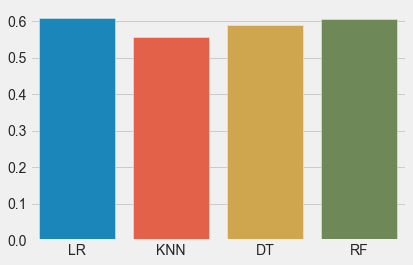

In [32]:
sns.barplot(x= ['LR','KNN','DT','RF'],y= [balanced_accuracy_score(y_test, y_pred_lr),
                                          balanced_accuracy_score(y_test, y_pred_knn), 
                                          balanced_accuracy_score(y_test, y_pred_DT),
                                          balanced_accuracy_score(y_test, y_pred_RF)])

### FEATURE IMPORTANCE


In [33]:
#random_forest

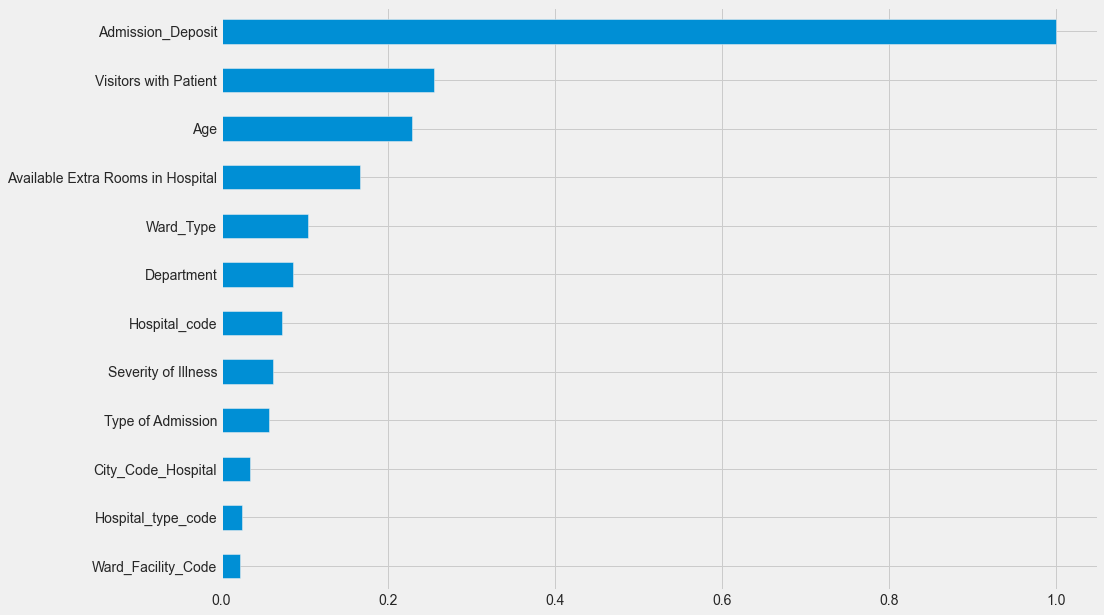

In [34]:
importance = pd.Series(random_forest.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False).head(20)
importance.sort_values().plot.barh(figsize=(14,10))
plt.show()

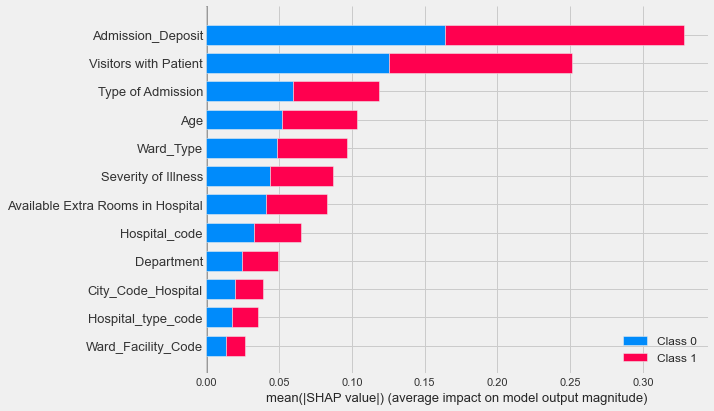

In [35]:
shap_values = shap.TreeExplainer(random_forest).shap_values(X_train, approximate=True)
shap.summary_plot(shap_values, X_train, plot_type="bar")

### OVERSAMPLING WITH SMOTE

In [36]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

the sample before smote: 1    173356
0     81394
Name: Stay, dtype: int64
the sample after smote: 0    173356
1    173356
Name: Stay, dtype: int64


<AxesSubplot:xlabel='Stay', ylabel='count'>

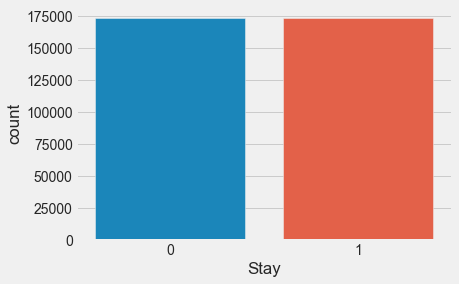

In [37]:
print(f'the sample before smote: {y_train.value_counts()}')
print(f'the sample after smote: {y_train_smote.value_counts()}')
sns.countplot(x=y_train_smote , data=data)

In [38]:
lr = LogisticRegression(class_weight='balanced',max_iter=300)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr=lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
balanced_accuracy_score(y_test, y_pred_lr)

              precision    recall  f1-score   support

           0       0.42      0.57      0.48     20349
           1       0.76      0.63      0.69     43339

    accuracy                           0.61     63688
   macro avg       0.59      0.60      0.58     63688
weighted avg       0.65      0.61      0.62     63688



0.5975866461246427

In [39]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
balanced_accuracy_score(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.40      0.52      0.45     20349
           1       0.74      0.63      0.68     43339

    accuracy                           0.59     63688
   macro avg       0.57      0.57      0.56     63688
weighted avg       0.63      0.59      0.61     63688



0.5745748417428456

In [40]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100,class_weight='balanced')
random_forest.fit(X_train_smote, y_train_smote)
y_pred_RF = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_RF))
balanced_accuracy_score(y_test, y_pred_RF)

              precision    recall  f1-score   support

           0       0.47      0.54      0.50     20349
           1       0.77      0.72      0.74     43339

    accuracy                           0.66     63688
   macro avg       0.62      0.63      0.62     63688
weighted avg       0.67      0.66      0.66     63688



0.6261800412266709

In [41]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_smote, y_train_smote)
y_pred_DT = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_DT))
balanced_accuracy_score(y_test, y_pred_DT)

              precision    recall  f1-score   support

           0       0.43      0.51      0.47     20349
           1       0.75      0.68      0.71     43339

    accuracy                           0.63     63688
   macro avg       0.59      0.60      0.59     63688
weighted avg       0.65      0.63      0.64     63688



0.5986387925267864

<AxesSubplot:>

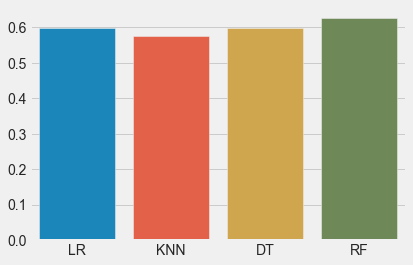

In [42]:
sns.barplot(x= ['LR','KNN','DT','RF'],y= [balanced_accuracy_score(y_test, y_pred_lr),
                                          balanced_accuracy_score(y_test, y_pred_knn), 
                                          balanced_accuracy_score(y_test, y_pred_DT),
                                          balanced_accuracy_score(y_test, y_pred_RF)])

### we see with oversampling that RandomForest is a little better

# WE WILL TRY WITH DUMMIES 

In [43]:
data_dummies=pd.read_csv('train_data.csv')
data_dummies

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [44]:
data_dummies['Bed Grade'].fillna(statistics.mode(data_dummies['Bed Grade']),inplace=True)
data_dummies['City_Code_Patient'].fillna(statistics.mode(data_dummies['City_Code_Patient']),inplace=True)

In [45]:
stay_dict = {'0-10': 0, '11-20': 0, '21-30': 1, '31-40': 1, '41-50': 1, '51-60': 1, '61-70': 1, '71-80': 1, '81-90': 1, '91-100': 1, 'More than 100 Days': 1}

In [46]:
data_dummies['Stay'] = data_dummies['Stay'].replace(stay_dict.keys(), stay_dict.values())

In [47]:
data_dummies=pd.get_dummies(data_dummies)
data_dummies.head()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,1,8,3,3,2.0,31397,7.0,2,4911.0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2,5,2,2.0,31397,7.0,2,5954.0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,10,1,2,2.0,31397,7.0,2,4745.0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,26,2,2,2.0,31397,7.0,2,7272.0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,26,2,2,2.0,31397,7.0,2,5558.0,1,...,0,0,0,0,0,1,0,0,0,0


### SPLIT THE dummies DATASET

In [48]:
X_dummies= data_dummies.drop(['Stay','case_id'], axis=1)
y_dummies= data_dummies['Stay']

X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y_dummies, test_size=0.2, random_state=42, shuffle=True)

### we try with RandomForest because is our best choice as we saw before

In [49]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42,n_jobs=-1)
random_forest.fit(X_train_dummies, y_train_dummies)
y_pred_RF_dummies = random_forest.predict(X_test_dummies)

print(classification_report(y_test_dummies, y_pred_RF_dummies))
balanced_accuracy_score(y_test_dummies, y_pred_RF_dummies)

              precision    recall  f1-score   support

           0       0.58      0.40      0.48     20250
           1       0.76      0.86      0.81     43438

    accuracy                           0.72     63688
   macro avg       0.67      0.63      0.64     63688
weighted avg       0.70      0.72      0.70     63688



0.6337872966663427

### oversample with smote

In [50]:
sm = SMOTE(random_state=42)
X_train_dummies_smote, y_train_dummies_smote = sm.fit_resample(X_train_dummies, y_train_dummies)

In [51]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42,n_jobs=-1)
random_forest.fit(X_train_dummies_smote, y_train_dummies_smote)
y_pred_RF_dummies_smote = random_forest.predict(X_test_dummies)

print(classification_report(y_test_dummies, y_pred_RF_dummies_smote))
balanced_accuracy_score(y_test_dummies, y_pred_RF_dummies_smote)

              precision    recall  f1-score   support

           0       0.57      0.44      0.49     20250
           1       0.76      0.85      0.80     43438

    accuracy                           0.72     63688
   macro avg       0.67      0.64      0.65     63688
weighted avg       0.70      0.72      0.70     63688



0.6411661724188698

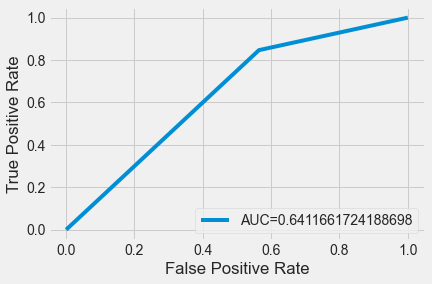

In [52]:
fpr, tpr, _ = metrics.roc_curve(y_test_dummies, y_pred_RF_dummies_smote)
auc = metrics.roc_auc_score(y_test_dummies, y_pred_RF_dummies_smote)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories

To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve

The max is 1 so it is a good model that needs more improvement

### we will use stratify with RandomizedSearchCV to find the best parameters by different tries!!

In [56]:
X_dummies= data_dummies.drop(['Stay','case_id'], axis=1)
y_dummies= data_dummies['Stay']

In [57]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y_dummies, test_size=0.2, random_state=42, stratify=y)

In [67]:
# Number of trees in random forest
n_estimators = [200]  #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']  #'sqrt'
# Maximum number of levels in tree
max_depth = [10,20,30]   #int(x) for x in np.linspace(10, 110, num = 11)
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]  #10
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]  #4
# Method of selecting samples for training each tree
bootstrap = [True,False] #True
# Create the random grid
model_parameter_sm  = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}
print(model_parameter_sm)

{'n_estimators': [200], 'max_features': ['auto'], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [68]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rand_model = RandomizedSearchCV(estimator = rf, 
                               param_distributions = model_parameter_sm,
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42,
                               n_jobs = -1)
# Fit the random search model
print(rand_model)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200]},
                   random_state=42, verbose=2)


In [70]:
smRF = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train_du, ysm_train_du = smRF.fit_resample(X_train_dummies,y_train_dummies)

In [71]:
rand_model.fit(Xsm_train_du, ysm_train_du)
print(rand_model.best_estimator_)
prediction = rand_model.predict(X_test_dummies)

The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.


Fitting 3 folds for each of 54 candidates, totalling 162 fits
RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=200)


In [72]:
cf_matrix = confusion_matrix(y_test_dummies, prediction)

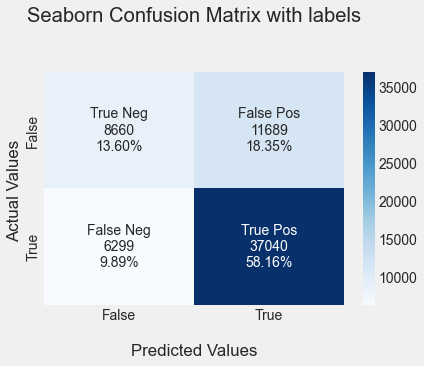

In [73]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [74]:
print(classification_report(y_test_dummies, prediction,target_names=['class 0:20 days', 'class 20:above days']))

                     precision    recall  f1-score   support

    class 0:20 days       0.58      0.43      0.49     20349
class 20:above days       0.76      0.85      0.80     43339

           accuracy                           0.72     63688
          macro avg       0.67      0.64      0.65     63688
       weighted avg       0.70      0.72      0.70     63688



In [75]:
model = {}

model['Algorithm'] = "Random Model Evaluation"
model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
model['Precision'] = round(precision_score(y_test, prediction),2)
model['Recall'] = round(recall_score(y_test, prediction),2)
model['F1 score'] = round(f1_score(y_test, prediction),2)
model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)

In [76]:
model

{'Algorithm': 'Random Model Evaluation',
 'Model Score': '71.76%',
 'Precision': 0.76,
 'Recall': 0.85,
 'F1 score': 0.8,
 'ROC-AUC score': 0.64}

In [77]:
#ax = plt.gca()
#RocCurveDisplay.from_estimator(final_model_sm, x_test, y_test, ax=ax, label=("Random Model Evaluation" , model['ROC-AUC score']) , alpha=0.8)

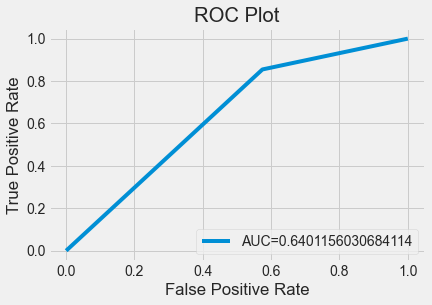

In [78]:
fpr, tpr, _ = metrics.roc_curve(y_test,prediction)
auc = metrics.roc_auc_score(y_test,prediction)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Plot')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

we cant improve the model yet  and we need more tries !